**Taller 4**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FFMpegFileWriter
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Punto 1

La función convergió en la iteración 2295


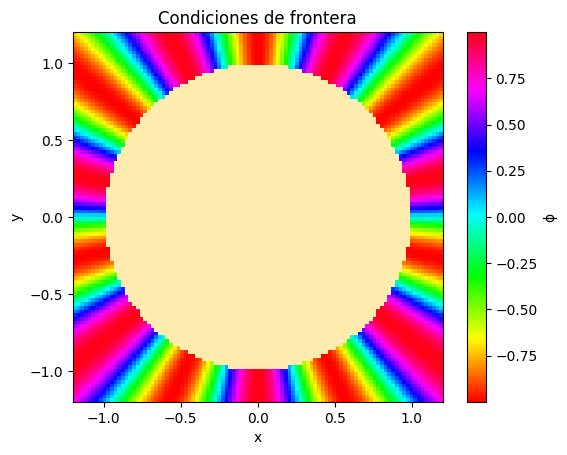

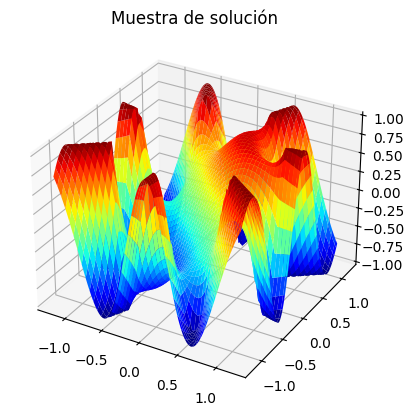

In [3]:
#Hacemos la grilla un poco mas grande quel circulo
r = 1
tamanio = r*1.2
pasos = 100
dpasos = tamanio*2/pasos
x = np.linspace(-tamanio, tamanio, pasos)
y = np.linspace(-tamanio, tamanio, pasos)
X, Y = np.meshgrid(x, y)

theta = np.arctan2(Y, X)
rho = -X - Y

grilla_ceros = np.zeros((pasos, pasos))
radio = np.sqrt(X**2 + Y**2)
circulo = radio < r
#Contamos cuantos puntos hay dentro del circulo del radio especificado
contador = 0
for i in circulo:
    for j in i:
        if j == True:
            contador += 1
grilla_ceros[circulo] = np.random.rand(contador)

grilla_ceros[radio >= r] = np.sin(7*theta[radio >= r])

#Defino la aproximación de diferencias finitas en 2d
def df(phi, i, j):
    return (1/4)*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]-4*np.pi*(dpasos**2)*rho[i,j])

contador = 0
error = 1
while error > 10e-4 and contador < 15000:
    if contador == 0:
        grilla_nueva = grilla_ceros.copy()
    for i in range(1, pasos-1):
        for j in range(1, pasos-1):
            if radio[i,j] < 1:
                grilla_nueva[i,j] = df(grilla_nueva, i, j)

    error = np.trace(np.abs(grilla_nueva - grilla_ceros))
    grilla_ceros = grilla_nueva.copy()
    contador += 1

print(f"La función convergió en la iteración {contador}")

fig, ax = plt.subplots()
img_base = ax.imshow(grilla_ceros, extent=[-tamanio, tamanio, -tamanio, tamanio], origin="lower", cmap="hsv")
cmap = ListedColormap(["none", "#ffebae"])
ax.imshow(circulo, extent=[-tamanio, tamanio, -tamanio, tamanio], cmap = cmap)
plt.colorbar(img_base, label="ϕ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Condiciones de frontera")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, grilla_nueva, cmap="jet")
plt.title("Muestra de solución")
plt.show()

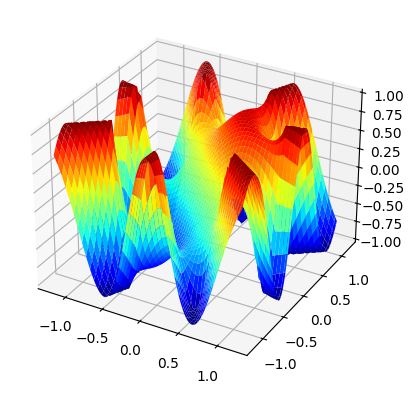

In [14]:
#EXTRA Punto 1
metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=60, metadata=metadata)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, grilla_nueva, cmap="jet")
azimo = 300
with writer.saving(fig, "Muestra de solución.mp4", 200):
    for i in range(360*2):
        ax.view_init(elev=30, azim=azimo, roll=0)
        azimo += 0.50

        writer.grab_frame()

**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "Muestra de Solución.mp4" para ver la animación correspondiente a este punto.

Punto 2

C es igual 0.3464365266167069


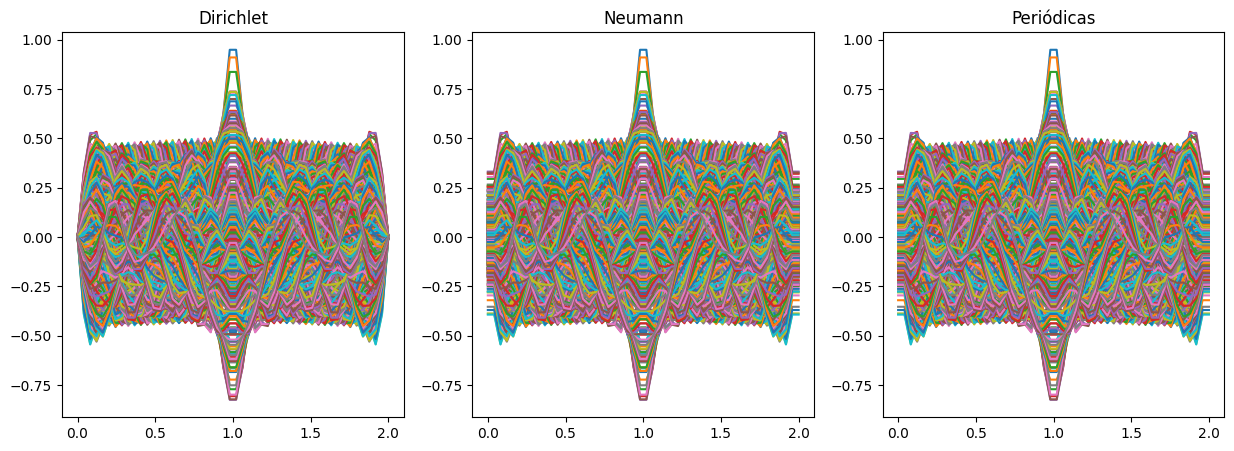

In [72]:
L = 2
N = 50
c = 3
x = np.linspace(0, 2, N)
dx = L/(N-1)
Nt = 1000
T = 8
dt = T/(Nt-1)
C = (c*dt/dx)**2
if C > 1:
    raise ValueError("El coeficiente de Courant C es > 1")
print(f"C es igual {C}")

func = np.zeros((Nt, N))

#Aplicar condiciones iniciales
func[0, :] = np.exp(-125 * (x - 1)**2)
func[1,:] = func[0,:]

#Definir condiciones de frontera
def dich(f, n):
    f[n, 0] = 0
    f[n, -1] = 0
    return f

def neu(f, n):
    f[n, 0] = f[n, 1]
    f[n, -1] = f[n, -2]
    return f

def per(f, n):
    f[n, 0] = f[n, -1]
    #f[n, -1] = f[n, 1]
    return f

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(1, Nt-1):
    for j in range(1, N-1):
        func[i+1,j] = 2*func[i,j] - func[i-1,j]  + C**2*(func[i,j+1] -2*func[i,j] + func[i,j-1])

    r_dich = dich(func, i)
    ax1.plot(x, r_dich[i,:])
    
    r_neu = neu(func, i)
    ax2.plot(x, r_neu[i,:])

    r_per = per(func, i)
    ax3.plot(x, r_per[i,:])

ax1.set_title("Dirichlet")
ax2.set_title("Neumann")
ax3.set_title("Periódicas")
plt.show()

C es igual 0.3464365266167069


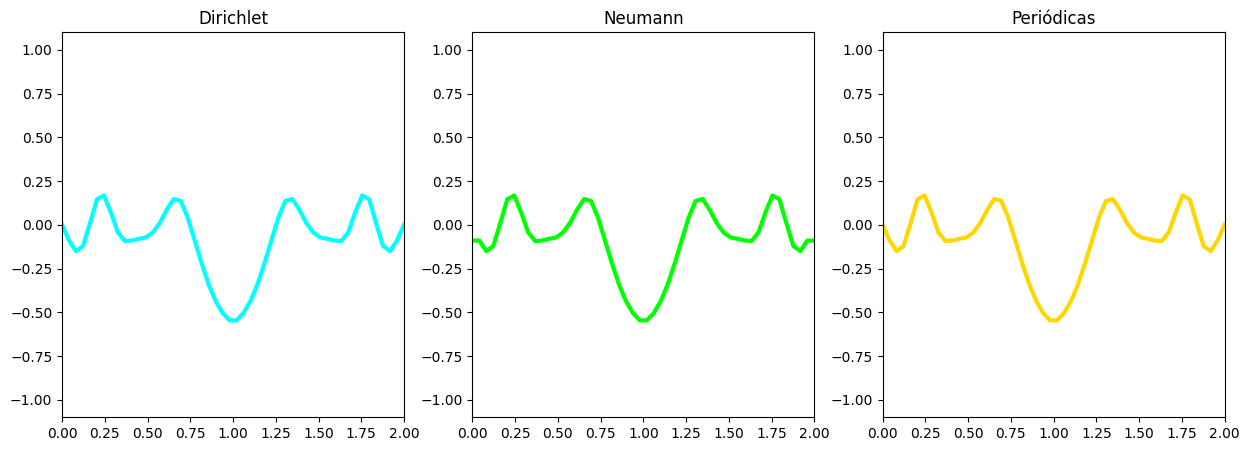

In [79]:
#Extra Punto 2
L = 2
N = 50
c = 3
x = np.linspace(0, 2, N)
dx = L / (N - 1)
Nt = 1000
T = 8
dt = T / (Nt - 1)
C = (c * dt / dx) ** 2
if C > 1:
    raise ValueError("El coeficiente de Courant C es > 1")
print(f"C es igual {C}")

func_dich = np.zeros((Nt, N))
func_neu = np.zeros((Nt, N))
func_per = np.zeros((Nt, N))

func_dich[0, :] = np.exp(-125 * (x - 1) ** 2)
func_dich[1, :] = func_dich[0, :]

func_neu[0, :] = np.exp(-125 * (x - 1) ** 2)
func_neu[1, :] = func_neu[0, :]

func_per[0, :] = np.exp(-125 * (x - 1) ** 2)
func_per[1, :] = func_per[0, :]

def dich(f, n):
    f[n, 0] = 0
    f[n, -1] = 0
    return f

def neu(f, n):
    f[n, 0] = f[n, 1]
    f[n, -1] = f[n, -2]
    return f

def per(f, n):
    f[n, 0] = f[n, -1]
    return f

metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=60, metadata=metadata)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax in [ax1, ax2, ax3]:
    ax.set_xlim((0, L))
    ax.set_ylim((-1.1, 1.1))
ax1.set_title("Dirichlet")
ax2.set_title("Neumann")
ax3.set_title("Periódicas")

line1, = ax1.plot([], [], lw=3, color="cyan")
line2, = ax2.plot([], [], lw=3, color="lime")
line3, = ax3.plot([], [], lw=3, color="gold")

with writer.saving(fig, "solucion_onda.mp4", 200):
    for i in range(1, Nt - 1):
        for j in range(1, N - 1):
            func_dich[i + 1, j] = 2 * func_dich[i, j] - func_dich[i - 1, j] + C**2 * (func_dich[i, j + 1] - 2 * func_dich[i, j] + func_dich[i, j - 1])
            func_neu[i + 1, j] = 2 * func_neu[i, j] - func_neu[i - 1, j] + C**2 * (func_neu[i, j + 1] - 2 * func_neu[i, j] + func_neu[i, j - 1])
            func_per[i + 1, j] = 2 * func_per[i, j] - func_per[i - 1, j] + C**2 * (func_per[i, j + 1] - 2 * func_per[i, j] + func_per[i, j - 1])

        r_dich = dich(func_dich, i)
        line1.set_data(x, r_dich[i, :])

        r_neu = neu(func_neu, i)
        line2.set_data(x, r_neu[i, :])

        r_per = per(func_per, i)
        line3.set_data(x, r_per[i, :])

        writer.grab_frame()

plt.show()


**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "solucion_onda.mp4" para ver la animación correspondiente a este punto.